<a href="https://colab.research.google.com/github/yihan-zhou/fastai/blob/main/week5_class_notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original file [link](https://github.com/fastai/course22/blob/master/05-linear-model-and-neural-net-from-scratch.ipynb)

In [37]:
import torch, numpy as np, pandas as pd
from torch import tensor

In [38]:
# Adjust display to wider screen
np.set_printoptions(linewidth=140)
torch.set_printoptions(linewidth=140, sci_mode=False, edgeitems=7)
pd.set_option('display.width', 140)

In [39]:
path = "train.csv"
df = pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [40]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [41]:
modes = df.mode().iloc[0]
modes

PassengerId                      1
Survived                       0.0
Pclass                         3.0
Name           Abbing, Mr. Anthony
Sex                           male
Age                           24.0
SibSp                          0.0
Parch                          0.0
Ticket                        1601
Fare                          8.05
Cabin                      B96 B98
Embarked                         S
Name: 0, dtype: object

In [42]:
df.fillna(modes, inplace=True)

In [43]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [44]:
df.describe(include=(np.number))

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [45]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,28.566970,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.199572,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,24.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: >

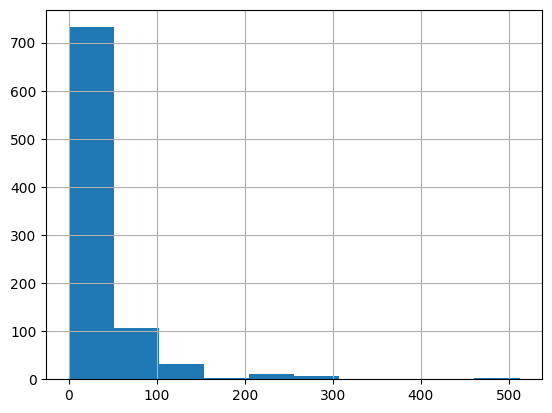

In [46]:
df.Fare.hist() # The majority of fare is less than 50 dollars.
# long tail distribution. Some models don't like long tail distribution, linear models are one of them, so as neural net.
# in this case, use log function, why?

<Axes: >

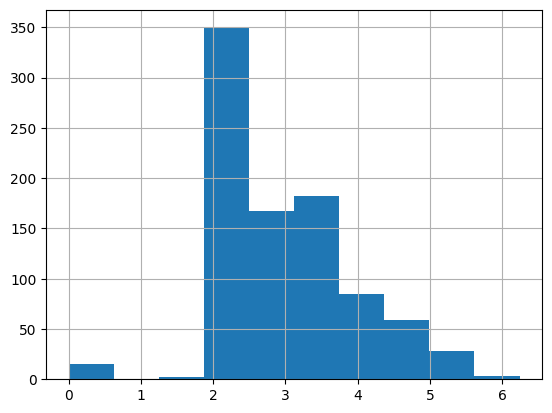

In [47]:
# log function changes really big number less big but don't really change small numbers
# See interactive graph here: https://www.geogebra.org/m/neA2Ajja#material/nVR73tRF
# log(0) is nan, useful trick is to do +1
# things like money or population, which grows exponentially, usually use log function
df["LogFare"] = np.log(df.Fare+1)
df.LogFare.hist()

In [16]:
pclasses = sorted(df.Pclass.unique())
pclasses

[1, 2, 3]

In [48]:
 df.describe(include=[object]) # include=[object] will show the unique()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,891
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,691,646


In [49]:
df = pd.get_dummies(df, columns=["Sex", "Embarked", "Pclass"])
# get dummies change every categorical variable into a boolean column
df.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'LogFare', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

In [50]:
added_cols = [ "Sex_female", "Sex_male", "Embarked_C", "Embarked_Q", "Embarked_S", "Pclass_1", "Pclass_2", "Pclass_3" ]
df[added_cols].head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,1,0,0,1
1,1,0,1,0,0,1,0,0
2,1,0,0,0,1,0,0,1
3,1,0,0,0,1,1,0,0
4,0,1,0,0,1,0,0,1


In [20]:
# The categorical data encoding doesn't apply to the name column, at least not so straightforwardly.
# See this notebook for feature engineering the name column:
# https://www.kaggle.com/code/cdeotte/titanic-using-name-only-0-81818/notebook

In [51]:
t_dep = tensor(df.Survived)

In [52]:
indep_cols = ["Age", "SibSp", "Parch", "LogFare"] + added_cols
t_indep = tensor(df[indep_cols].values, dtype=torch.float)
t_indep

tensor([[22.0000,  1.0000,  0.0000,  2.1102,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [38.0000,  1.0000,  0.0000,  4.2806,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000],
        [26.0000,  0.0000,  0.0000,  2.1889,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [35.0000,  1.0000,  0.0000,  3.9908,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000],
        [35.0000,  0.0000,  0.0000,  2.2028,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [24.0000,  0.0000,  0.0000,  2.2469,  0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  0.0000,  0.0000,  1.0000],
        [54.0000,  0.0000,  0.0000,  3.9677,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  1.0000,  0.0000,  0.0000],
        ...,
        [25.0000,  0.0000,  0.0000,  2.0857,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000,  0.0000,  0.0000,  1.0000],
        [39.0000,  0.0000,  5.0000,  3.4054

In [53]:
t_indep.shape

torch.Size([891, 12])

In [54]:
len(t_indep.shape) # called rank, it's the number of dimensions or axes that the tensor has

2

## Setting up a linear model

In [55]:
torch.manual_seed(442)
n_coeff = t_indep.shape[1] # in this case, 12 -which is the number of columns
coeffs = torch.randn(n_coeff) - 0.5
# randn will provide from zero to one, minus 0.5 will give us a number in between
coeffs = tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])
coeffs

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625])

In [57]:
# t_indep.shape, coeffs.shape

In [58]:
# tensor([1.1,2,3])*tensor(2) # demostration for broadcasting, concept comes from APL - notation coming from the 50s
# # tensor([1.1,2,3])*tensor(2,2) # << this won't work

In [59]:
t_indep * coeffs

tensor([[-10.1838,   0.1386,   0.0000,  -0.4773,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-17.5902,   0.1386,   0.0000,  -0.9683,  -0.2632,  -0.0000,   0.4876,   0.0000,   0.0000,  -0.4392,   0.0000,   0.0000],
        [-12.0354,   0.0000,   0.0000,  -0.4951,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-16.2015,   0.1386,   0.0000,  -0.9027,  -0.2632,  -0.0000,   0.0000,   0.0000,   0.2799,  -0.4392,   0.0000,   0.0000],
        [-16.2015,   0.0000,   0.0000,  -0.4983,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.0000,   0.0000,   0.3625],
        [-11.1096,   0.0000,   0.0000,  -0.5082,  -0.0000,  -0.3147,   0.0000,   0.3136,   0.0000,  -0.0000,   0.0000,   0.3625],
        [-24.9966,   0.0000,   0.0000,  -0.8975,  -0.0000,  -0.3147,   0.0000,   0.0000,   0.2799,  -0.4392,   0.0000,   0.0000],
        ...,
        [-11.5725,   0.0000,   0.0000,  -0.4718,  -0.0000,  -0.3147,   0.0000

In [60]:
# df[indep_cols].columns

In [61]:
# notice Age, the first column is much bigger than other columns
# it's not ideal, because 0.5 * Age means very different comparing to 0.5 * LogFair
# the solution is to divide the value with the maximum (one way of normalizing the values)
values, indices = t_indep.max(dim=0)
# it returns the value of the maximum, and the index of which that row is
# dim = 0 means getting the max over the rows, dim = 1 means getting the max of over the columns
values, indices

(tensor([80.0000,  8.0000,  6.0000,  6.2409,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000,  1.0000]),
 tensor([630, 159, 678, 258,   1,   0,   1,   5,   0,   1,   9,   0]))

In [62]:
# here we use broadcasting again
t_indep = t_indep/values
t_indep

tensor([[0.2750, 0.1250, 0.0000, 0.3381, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4750, 0.1250, 0.0000, 0.6859, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000],
        [0.3250, 0.0000, 0.0000, 0.3507, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4375, 0.1250, 0.0000, 0.6395, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        [0.4375, 0.0000, 0.0000, 0.3530, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.3000, 0.0000, 0.0000, 0.3600, 0.0000, 1.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.6750, 0.0000, 0.0000, 0.6358, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 1.0000, 0.0000, 0.0000],
        ...,
        [0.3125, 0.0000, 0.0000, 0.3342, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 1.0000],
        [0.4875, 0.0000, 0.8333, 0.5456, 1.0000, 0.0000, 0.0000, 1.0000, 0.0000, 0.0000, 0.0000, 1.0000],
        [0.3375, 0.0000, 0.0000, 

In [63]:
t_indep * coeffs
# this time much similar ranges than before

tensor([[-0.1273,  0.0173,  0.0000, -0.0765, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2199,  0.0173,  0.0000, -0.1551, -0.2632, -0.0000,  0.4876,  0.0000,  0.0000, -0.4392,  0.0000,  0.0000],
        [-0.1504,  0.0000,  0.0000, -0.0793, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2025,  0.0173,  0.0000, -0.1446, -0.2632, -0.0000,  0.0000,  0.0000,  0.2799, -0.4392,  0.0000,  0.0000],
        [-0.2025,  0.0000,  0.0000, -0.0798, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.1389,  0.0000,  0.0000, -0.0814, -0.0000, -0.3147,  0.0000,  0.3136,  0.0000, -0.0000,  0.0000,  0.3625],
        [-0.3125,  0.0000,  0.0000, -0.1438, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.4392,  0.0000,  0.0000],
        ...,
        [-0.1447,  0.0000,  0.0000, -0.0756, -0.0000, -0.3147,  0.0000,  0.0000,  0.2799, -0.0000,  0.0000,  0.3625],
        [-0.2257,  0.0000,  0.2007, -0.1234

In [ ]:
# preds = (t_indep * coeffs).sum(axis=1)
preds = (t_indep * coeffs).sum(axis=1) # adding them up for each row, give us the predictions
preds

In [65]:
# len(preds) # a vextor of predictions for all the rows

In [66]:
preds[:10]

tensor([ 0.1412, -0.5725,  0.1494, -0.7523,  0.0453,  0.1411, -0.9303,  0.2961,  0.2128,  0.2465])

In [67]:
loss = torch.abs(preds - t_dep).mean() # simple loss function, mean absolute value
loss

tensor(0.6020)

In [68]:
# hottip from Jeremy,
# do the code step by step manually and then copy paste them into a function
# maintain the working in progress in the notebook helps to clarify once coming back to it after long time
# E.g.

# def calc_preds(t_indep, coeffs): return (t_indep * coeffs).sum(axis=1)
# def calc_loss(t_indep, coeffs, t_dep): return torch.abs(calc_preds(t_indep, coeffs) - t_dep).mean()
def calc_preds(coeffs, indeps): return (indeps*coeffs).sum(axis=1)
def calc_loss(coeffs, indeps, deps): return torch.abs(calc_preds(coeffs, indeps)-deps).mean()

# t_indep: tensor of the independent variables, the features
# t_dep: tensor of the dependent variables, the target

## Doing a gradient descent step

In [69]:
coeffs.requires_grad_()
# To turn on requires_grad, this got the coefficients for us
# this is "in-place operation", which will change the coeffs
# An in-place operation is an operation that changes directly the content of a given Tensor without making a copy.

tensor([-0.4629,  0.1386,  0.2409, -0.2262, -0.2632, -0.3147,  0.4876,  0.3136,  0.2799, -0.4392,  0.2103,  0.3625], requires_grad=True)

In [70]:
loss = calc_loss(t_indep, coeffs, t_dep)
loss

tensor(0.6020, grad_fn=<MeanBackward0>)

In [71]:
loss.backward()

In [72]:
coeffs.grad
# E.g. "-0.0044" indicates if we increase age, the loss will go down, which is desirable
# we subtract the coefficients times the learning rates

tensor([-0.1019,  0.0070, -0.0082, -0.1458, -0.1886,  0.0191, -0.0786,  0.0101, -0.1010, -0.2424, -0.1706,  0.2435])

In [73]:
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
coeffs.grad

tensor([-0.2037,  0.0140, -0.0165, -0.2916, -0.3771,  0.0382, -0.1571,  0.0202, -0.2020, -0.4848, -0.3412,  0.4871])

As you see, our .grad values are have doubled. That's because it added the gradients a second time. For this reason, after we use the gradients to do a gradient descent step, we need to set them back to zero.

In [74]:
# This is a context manager in PyTorch that temporarily sets all the gradients to zero.
# It's used here because the subsequent operations do not need to compute gradients,
# which can save memory and computations.
loss = calc_loss(coeffs, t_indep, t_dep)
loss.backward()
with torch.no_grad():
  coeffs.sub_(coeffs.grad * 0.1)
  coeffs.grad.zero_()
  print(calc_loss(t_indep, coeffs, t_dep))
# this is one step

tensor(0.5377)


## Training the linear model

In [75]:
from fastai.data.transforms import RandomSplitter

In [76]:
train_set, val_set = RandomSplitter(seed=42)(df)

In [77]:
train_set

(#713) [788,525,821,253,374,98,215,313,281,305...]

In [78]:
val_set

(#178) [303,778,531,385,134,476,691,443,386,128...]

In [79]:
t_indep.shape

torch.Size([891, 12])

In [81]:
# getting the tensor for both the independent variable set
# and then the dependent variable set
# train_indep, val_indep = t_indep[train_set], t_indep[val_set]
# train_dep, val_dep = t_dep[train_set], t_dep[val_set]

trn_split,val_split=RandomSplitter(seed=42)(df)
trn_indep,val_indep = t_indep[trn_split],t_indep[val_split]
trn_dep,val_dep = t_dep[trn_split],t_dep[val_split]
len(trn_indep),len(val_indep)

# another tip, just remember how to do something from one library and use it everywhere

(713, 178)

In [82]:
# def update_coeffs(coeffs, lr):return coeffs.sub_(coeffs.grad * lr)
def update_coeffs(coeffs, lr):
    coeffs.sub_(coeffs.grad * lr)
    coeffs.grad.zero_()

In [83]:
# def one_epoch(coeffs, lr):
#   loss = calc_loss(t_indep, coeffs, t_dep)
#   loss.backward()
#   with torch.no_grad():update_coeffs(coeffs, lr)
#   print(f"{loss: .3f}", end ="; ")
def one_epoch(coeffs, lr):
    loss = calc_loss(coeffs, trn_indep, trn_dep)
    loss.backward()
    with torch.no_grad(): update_coeffs(coeffs, lr)
    print(f"{loss:.3f}", end="; ")

In [84]:
# def init_coeff(): return (torch.randn(n_coeff) - 0.5).requires_grad_()
def init_coeffs(): return (torch.rand(n_coeff)-0.5).requires_grad_()

In [85]:
# def train_model(epoch=30, lr = 0.01):
#   torch.manual_seed(42)
#   coeffs = init_coeff()
#   for i in range(epoch): one_epoch(coeffs, lr)
#   return coeffs

def train_model(epochs=30, lr=0.01):
    torch.manual_seed(442)
    coeffs = init_coeffs()
    for i in range(epochs): one_epoch(coeffs, lr=lr)
    return coeffs

In [86]:
coeffs = train_model(18, 0.02) # this will print the loss for us in each step

0.598; 0.594; 0.589; 0.585; 0.580; 0.576; 0.572; 0.568; 0.564; 0.560; 0.556; 0.552; 0.548; 0.544; 0.540; 0.537; 0.533; 0.530; 

In [87]:
def show_coeffs(): return dict(zip(indep_cols,coeffs.requires_grad_(False))) # coeffs.requires_grad_(False) is to turn off gradient computation
show_coeffs()

{'Age': tensor(-0.4285),
 'SibSp': tensor(0.1360),
 'Parch': tensor(0.2436),
 'LogFare': tensor(-0.1781),
 'Sex_female': tensor(-0.1994),
 'Sex_male': tensor(-0.3271),
 'Embarked_C': tensor(0.5169),
 'Embarked_Q': tensor(0.3098),
 'Embarked_S': tensor(0.3059),
 'Pclass_1': tensor(-0.3503),
 'Pclass_2': tensor(0.2550),
 'Pclass_3': tensor(0.2804)}

## Measuring accuracy

In [88]:
preds = calc_preds(coeffs, val_indep)

In [89]:
results = val_dep.bool()==(preds>0.5) # compare the actual in validation set with the prediction (any that is bigger than 0.5)
results[:10]

tensor([False,  True,  True,  True,  True,  True,  True, False,  True, False])

In [90]:
results.float().mean()
# We are right about this % of the time..

tensor(0.6067)

In [91]:
# let's create an accuracy function
# def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()

def acc(coeffs): return (val_dep.bool()==(calc_preds(coeffs, val_indep)>0.5)).float().mean()
acc(coeffs)

tensor(0.6067)

## Using sigmoid
Make the prediction within 0 and 1

In [92]:
preds[:10]

tensor([ 0.1628,  0.0727,  0.2816,  0.0144,  0.0246, -0.0195,  0.5410,  0.1362,  0.3097,  0.4371])

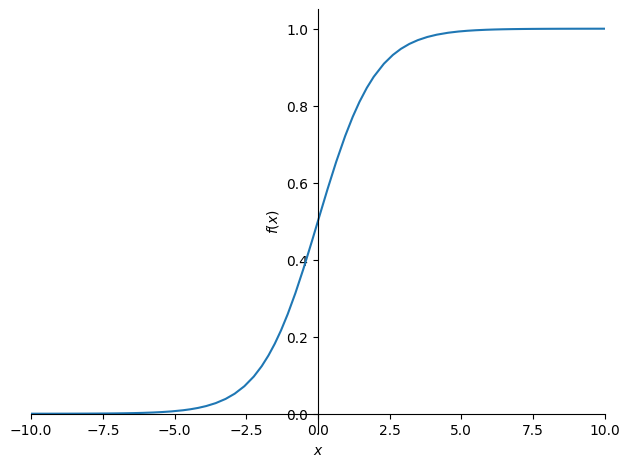

In [93]:
import sympy
sympy.plot("1/(1+exp(-x))", xlim = (-10, 10))

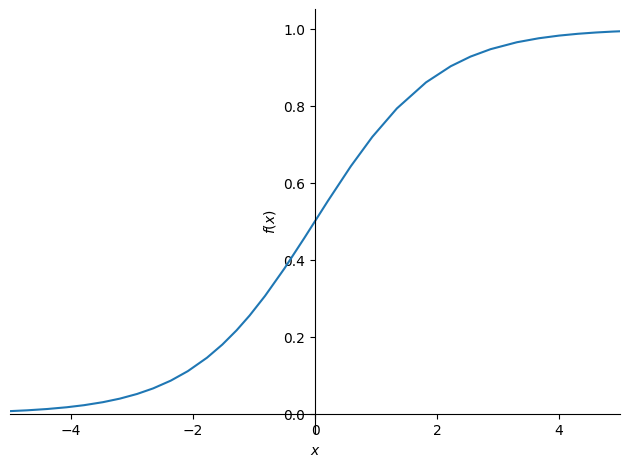

In [94]:
sympy.plot("1/(1+exp(-x))", xlim = (-5, 5))

In [95]:
# def calc_preds(coeffs, indeps): return torch.sigmoid((indeps * coeffs).sum(axis=1))
def calc_preds(coeffs, indeps): return torch.sigmoid((indeps * coeffs).sum(axis=1))

In [96]:
coeffs = train_model(lr=100)

0.513; 0.330; 0.319; 0.268; 0.205; 0.200; 0.198; 0.197; 0.196; 0.196; 0.195; 0.195; 0.195; 0.195; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 

In [98]:
acc(coeffs)

tensor(0.8258)

In [99]:
show_coeffs()

{'Age': tensor(-1.4444),
 'SibSp': tensor(-1.1728),
 'Parch': tensor(-0.5275),
 'LogFare': tensor(0.3396),
 'Sex_female': tensor(8.4492),
 'Sex_male': tensor(-10.3604),
 'Embarked_C': tensor(2.0658),
 'Embarked_Q': tensor(2.3102),
 'Embarked_S': tensor(-4.6281),
 'Pclass_1': tensor(3.1634),
 'Pclass_2': tensor(2.2232),
 'Pclass_3': tensor(-6.5861)}

A general rule when you have a binary dependent variables, one to zero
The very last step would be chuck it through a sigmoid.

## Using matrix product
Multiplying elements together and then adding across rows is identical to doing a matrix-vector product!

In [100]:
(val_indep * coeffs).sum(axis=1)
# this is the "times dot sum" version. we can't use it for matrix-multiply
# since it'selement-wise operation, like times, plus, minus, divide.

tensor([ 12.6903, -14.9516, -15.1994, -12.8557, -13.0731, -13.3576,   3.9139,   5.6823, -22.2910,   3.4324, -22.0333, -15.3969, -21.7456,
          3.8588, -22.0789, -12.4572, -12.8183,   5.6843, -13.2901,  -3.2013, -21.8890, -12.6558,  12.9964,   5.0832, -21.8222, -15.0407,
         -2.8818, -12.7641, -21.7582,   3.8580,   5.6870,  -3.7522, -21.7988, -22.0055,  12.5820,  -3.3744, -12.4802,  13.4764, -21.8881,
         -3.2440, -12.9755, -21.8881, -13.4208,  13.3371, -21.8159,  -3.7432, -21.8236, -21.9965, -14.9568,  -3.0475,  -5.7289, -22.4354,
        -22.3101, -21.9125, -13.1018, -13.2102, -14.9516, -22.2185, -21.8339, -21.9347,  -5.4901, -21.9146, -13.0826, -21.8347,   5.2826,
        -12.0549, -13.0550, -22.1033, -15.4404,   5.3773, -21.9251,   3.4714, -13.1921, -21.8800, -12.0793, -21.7453, -21.8881, -12.4124,
        -12.9647, -13.4630, -12.9637,  13.1334, -21.8710, -21.8931,   5.2744,  -6.6411,  -5.3471,   6.6702,  12.2612, -13.0370, -22.0307,
        -21.8881,  13.3912, -15.30

In [101]:
val_indep @ coeffs

tensor([ 12.6903, -14.9516, -15.1994, -12.8557, -13.0731, -13.3576,   3.9139,   5.6823, -22.2910,   3.4324, -22.0333, -15.3969, -21.7456,
          3.8588, -22.0789, -12.4572, -12.8183,   5.6843, -13.2901,  -3.2013, -21.8890, -12.6558,  12.9964,   5.0832, -21.8222, -15.0407,
         -2.8818, -12.7641, -21.7582,   3.8580,   5.6870,  -3.7522, -21.7988, -22.0055,  12.5820,  -3.3744, -12.4802,  13.4764, -21.8881,
         -3.2440, -12.9755, -21.8881, -13.4208,  13.3371, -21.8159,  -3.7432, -21.8236, -21.9965, -14.9568,  -3.0475,  -5.7289, -22.4354,
        -22.3101, -21.9125, -13.1018, -13.2102, -14.9516, -22.2185, -21.8339, -21.9347,  -5.4901, -21.9146, -13.0826, -21.8347,   5.2826,
        -12.0549, -13.0550, -22.1033, -15.4404,   5.3773, -21.9251,   3.4714, -13.1921, -21.8800, -12.0793, -21.7453, -21.8881, -12.4124,
        -12.9647, -13.4630, -12.9637,  13.1334, -21.8710, -21.8931,   5.2744,  -6.6411,  -5.3471,   6.6702,  12.2612, -13.0370, -22.0307,
        -21.8881,  13.3912, -15.30

In [102]:
def calc_preds(coeffs, indeps): return torch.sigmoid(indeps @ coeffs) # indeps @ coeffs is the matrix mutiply
def init_coeff(): return (torch.randn(n_coeff, 1) * 0.1).requires_grad_()
# previous init_coeff function
# def init_coeff(): return (torch.randn(n_coeff) - 0.5).requires_grad_()

In [103]:
# turn the training and valication set into matrix from vector
# train_dep = train_dep[:,None]
# val_dep = val_dep[:,None]
trn_dep = trn_dep[:,None]
val_dep = val_dep[:,None]

In [105]:
# train_dep.shape, val_dep.shape

In [106]:
coeffs = train_model(lr=100)

0.495; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 0.379; 

In [107]:
acc(coeffs)

tensor(0.5955)

## A neural network

In [108]:
def init_coeffs(n_hidden=20):
    layer1 = (torch.rand(n_coeff, n_hidden)-0.5)/n_hidden
    layer2 = torch.rand(n_hidden, 1)-0.3
    const = torch.rand(1)[0]
    return layer1.requires_grad_(),layer2.requires_grad_(),const.requires_grad_()

In [109]:
import torch.nn.functional as F

In [110]:
def calc_preds(coeffs, indeps):
    l1,l2,const = coeffs # expand the list of variables in coeffs
    res = F.relu(indeps@l1) # do a matrix multiply, then replace negative with 0 via Relu
    res = res@l2 + const
    return torch.sigmoid(res)

In [112]:
# def update_coeffs(coeffs, lr):
#     for layer in coeffs:
#         layer.sub_(layer.grad * lr)
#         layer.grad.zero_()
def update_coeffs(coeffs, lr):
    for layer in coeffs:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [113]:
coeffs = train_model(lr=1.4)

0.543; 0.532; 0.519; 0.502; 0.482; 0.459; 0.429; 0.395; 0.360; 0.329; 0.305; 0.287; 0.273; 0.263; 0.254; 0.248; 0.243; 0.239; 0.235; 0.232; 0.230; 0.228; 0.226; 0.225; 0.223; 0.222; 0.221; 0.220; 0.219; 0.218; 

In [114]:
coeffs = train_model(lr=20)

0.543; 0.398; 0.270; 0.363; 0.202; 0.198; 0.196; 0.194; 0.194; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.193; 0.192; 0.192; 0.192; 0.192; 0.192; 

In [115]:
acc(coeffs)

tensor(0.8258)

## Deep learning
The neural net in the previous section only uses one hidden layer, so it doesn't count as "deep" learning.

In [116]:
def init_coeffs():
    hiddens = [10, 10]  # <-- set this to the size of each hidden layer you want
    sizes = [n_coeff] + hiddens + [1]
    n = len(sizes)
    layers = [(torch.rand(sizes[i], sizes[i+1])-0.3)/sizes[i+1]*4 for i in range(n-1)]
    consts = [(torch.rand(1)[0]-0.5)*0.1 for i in range(n-1)]
    for l in layers+consts: l.requires_grad_()
    return layers,consts

In [117]:
import torch.nn.functional as F

def calc_preds(coeffs, indeps):
    layers,consts = coeffs
    n = len(layers)
    res = indeps
    for i,l in enumerate(layers):
        res = res@l + consts[i]
        if i!=n-1: res = F.relu(res)
    return torch.sigmoid(res) # activation function

In [118]:
def update_coeffs(coeffs, lr):
    layers,consts = coeffs
    for layer in layers+consts:
        layer.sub_(layer.grad * lr)
        layer.grad.zero_()

In [119]:
coeffs = train_model(lr=4)

0.512; 0.483; 0.469; 0.456; 0.445; 0.404; 0.378; 0.378; 0.378; 0.377; 0.376; 0.373; 0.352; 0.245; 0.236; 0.211; 0.213; 0.206; 0.200; 0.199; 0.198; 0.196; 0.195; 0.194; 0.194; 0.194; 0.194; 0.194; 0.194; 0.193; 

In [120]:
acc(coeffs)

tensor(0.8258)